### Name: Pavankumar Patil
Data Science and Bussiness Analyst Intern @ The Spark Foundation.

##  Task#1 : Predicting using Supervised ML

* Predicting the percentage of an student based on the number of study hourse
* What will be predicted score if a student studies 9.25 hr/day?

##### Importing the Libraries

In [50]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

##### Reading the data set

In [51]:
url = "student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Exploration

In [52]:
#Knowing the data types
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [53]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
#Knowing the relationship between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


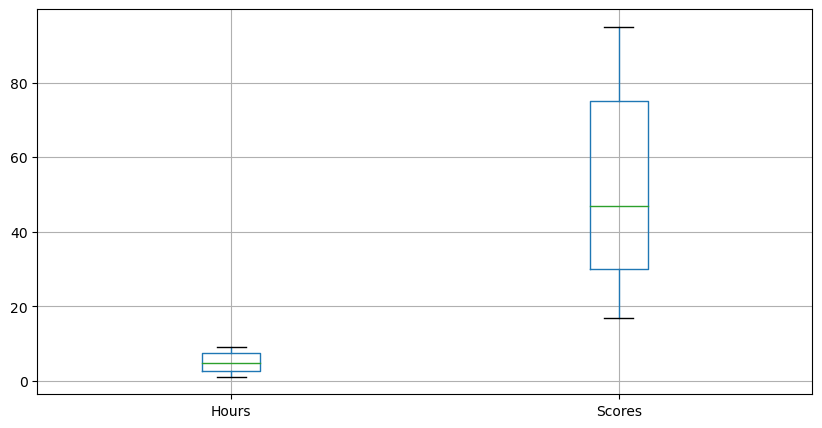

In [55]:
#Checking for the outlier
data.boxplot(figsize=(10,5))
plt.show()

* No outliers found

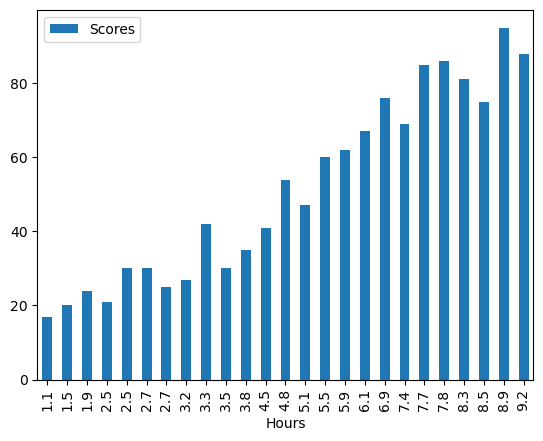

In [56]:
data.sort_values('Hours').plot(x='Hours',y='Scores',kind='bar')
plt.show()

Text(0.5, 1.0, 'Hours Vs Score')

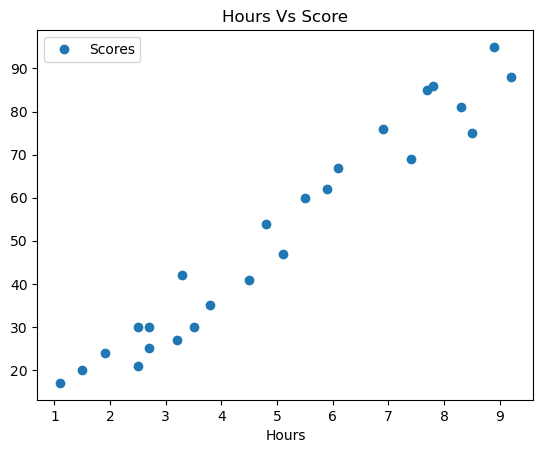

In [57]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Score')

### Building Model

In [58]:
from sklearn.model_selection import train_test_split as slt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#### Splitting the dataset into training set and test set

In [59]:
 X_train, X_test, y_train, y_test = slt(X , y, 
                                        test_size=0.25, random_state=0)

#### Fitting simple linear regression to the training set

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

#### Predicting the test set results

In [61]:
y_pred = lr.predict(X_test)

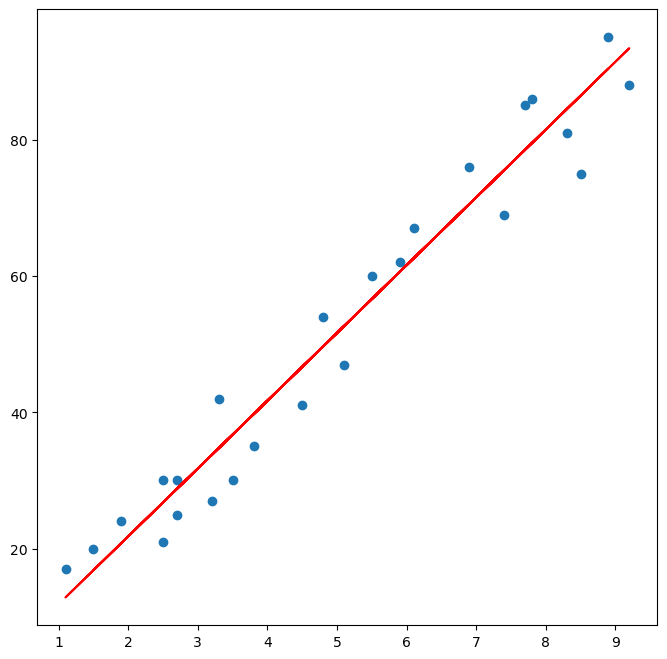

In [62]:
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')
plt.show()

In [63]:
hours = [[9.25]]
pred_of_input = lr.predict(hours)
print(f"For hours {hours[0][0]}, predicted score is {pred_of_input[0]}.")

For hours 9.25, predicted score is 93.89272889341655.


### Evaluation

##### Root Mean Square Error

In [17]:
from sklearn.metrics import mean_squared_error
import math
print('Root Mean Square error is:',math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Square error is: 4.5092043283688055


##### Mean Absolute Error

In [18]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absolute Error:", mae(y_test,y_pred))

Mean Absolute Error: 4.130879918502486


##### R Square and Adjusted R square

In [19]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
result = sm.OLS(y_train,X_train).fit()
print('R square value:',result.rsquared)
print('Adjusted R square value:',result.rsquared_adj)

R square value: 0.9913671067726945
Adjusted R square value: 0.9908592895240295
